<a href="https://colab.research.google.com/github/nika-va/practice/blob/main/03_introduction_to_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-09-16 13:45:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   216MB/s    in 0.5s    

2023-09-16 13:45:26 (216 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Inspect the data
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os
# walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "pizza_steak".
There are 2 directories and 0 images in "pizza_steak/train".
There are 0 directories and 750 images in "pizza_steak/train/steak".
There are 0 directories and 750 images in "pizza_steak/train/pizza".
There are 2 directories and 0 images in "pizza_steak/test".
There are 0 directories and 250 images in "pizza_steak/test/steak".
There are 0 directories and 250 images in "pizza_steak/test/pizza".


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep 16 13:45 .
drwxr-xr-x 1 root root 4096 Sep 16 13:45 ..
drwxr-xr-x 4 root root 4096 Sep 16 13:45 test
drwxr-xr-x 4 root root 4096 Sep 16 13:45 train


In [7]:
len(os.listdir('pizza_steak/train/steak'))

750

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(random_image[0])
  print(f"image shape: {img.shape}")
  return img

2142812.jpg
image shape: (384, 512, 3)


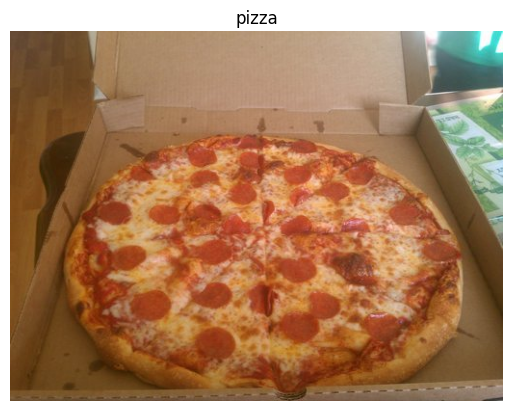

In [10]:
img = view_random_image(target_dir='pizza_steak/train',
                        target_class='pizza')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 21s 151ms/step - loss: 0.5697 - accuracy: 0.7000 - val_loss: 0.4008 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 0.4305 - accuracy: 0.8080 - val_loss: 0.3214 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4212 - accuracy: 0.8153 - val_loss: 0.3819 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3842 - accuracy: 0.8420 - val_loss: 0.3053 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3498 - accuracy: 0.8547 - val_loss: 0.3033 - val_accuracy: 0.8660


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

2995731.jpg
image shape: (512, 512, 3)
3438319.jpg
image shape: (512, 512, 3)


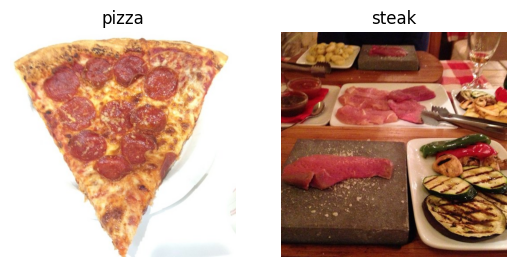

In [14]:
plt.figure()
plt.subplot(1,2,1)
pizza_img = view_random_image('pizza_steak/train', 'pizza')
plt.subplot(1,2,2)
steak_img = view_random_image('pizza_steak/train', 'steak')

In [15]:
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)


In [17]:
# tf.random.set_seed(42)
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32,
                                              #  seed=42
                                               )
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                            #  seed=42
                                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
images, labels = train_data.next()

In [19]:
images.shape, labels.shape

((32, 224, 224, 3), (32,))

In [20]:
# how many batches are there?
# 1500/32
len(train_data)

47

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [22]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 129ms/step - loss: 1.5150 - accuracy: 0.5947 - val_loss: 0.5620 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4585 - accuracy: 0.7880 - val_loss: 0.3880 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3357 - accuracy: 0.8660 - val_loss: 0.3585 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.2124 - accuracy: 0.9287 - val_loss: 0.4024 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 116ms/step - loss: 0.1189 - accuracy: 0.9727 - val_loss: 0.3804 - val_accuracy: 0.8440


<Axes: >

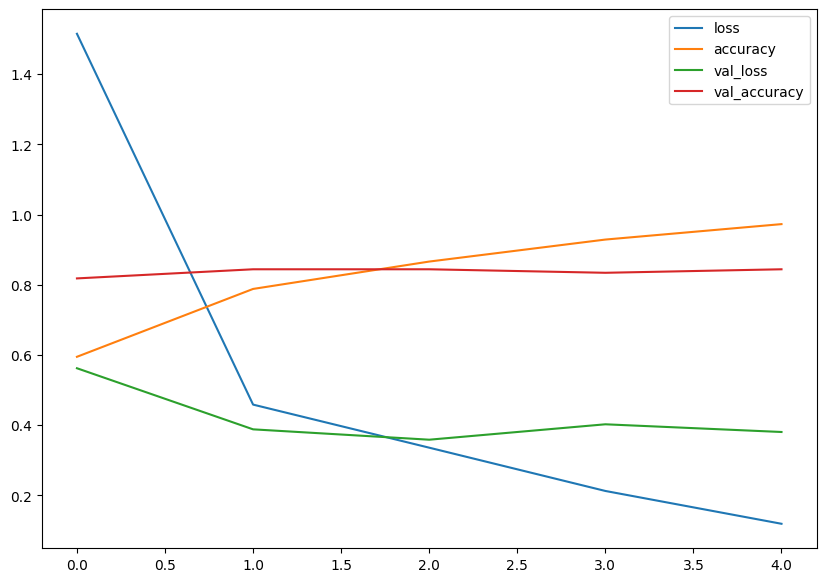

In [24]:
# 5. evaluation
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [25]:
# training

def plot_loss_curves(history):
  """
  Returns seperate training and validation history plots
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel("epochs")
  plt.legend()

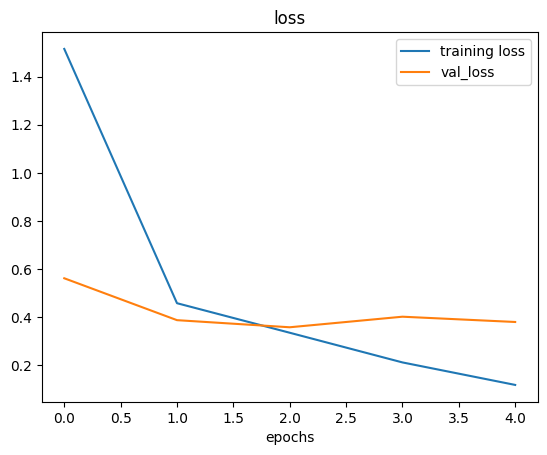

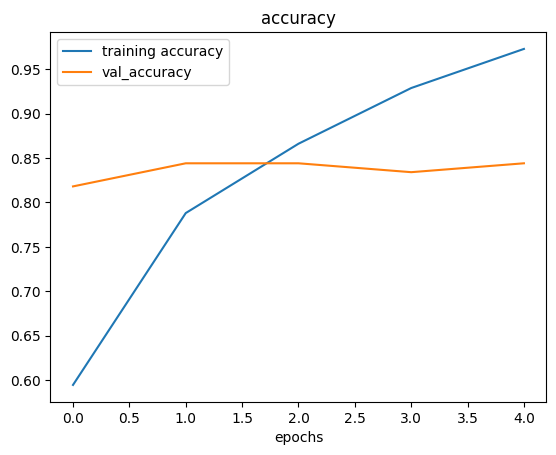

In [26]:
plot_loss_curves(history_4)

In [27]:
# model is overfitting the training dataset.

In [28]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_5.compile(loss='binary_crossentropy',
                optimizer= Adam(),
                metrics='accuracy')
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 0.5547 - accuracy: 0.7280 - val_loss: 0.4386 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4594 - accuracy: 0.7867 - val_loss: 0.4112 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4179 - accuracy: 0.8133 - val_loss: 0.3657 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3854 - accuracy: 0.8360 - val_loss: 0.3552 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3573 - accuracy: 0.8453 - val_loss: 0.3093 - val_accuracy: 0.8820


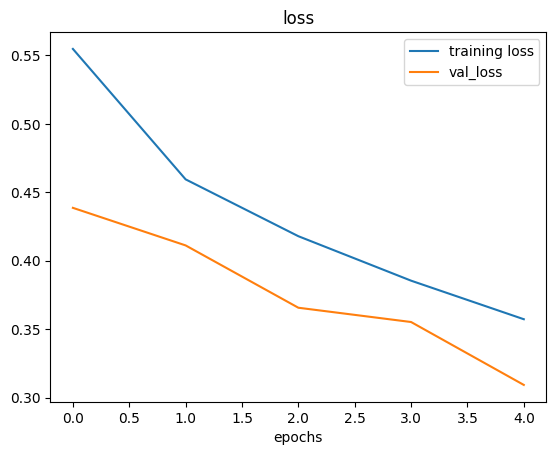

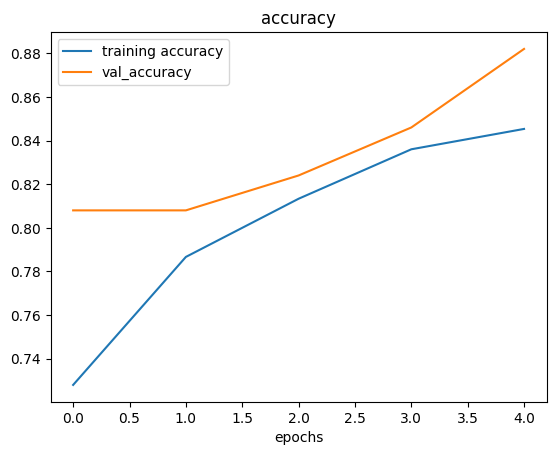

In [29]:
plot_loss_curves(history_5)

In [30]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)


In [31]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size=(224,224),
                                                         class_mode='binary',
                                                         shuffle=True)



Found 1500 images belonging to 2 classes.


In [32]:
images_augmented, labels_augmented = train_data_augmented.next()

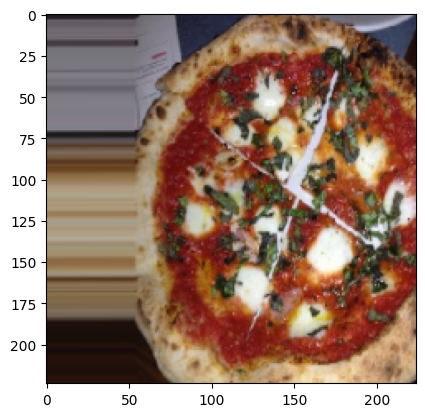

In [33]:
plt.imshow(images_augmented[10])

In [34]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy',
                optimizer= Adam(),
                metrics='accuracy')
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 649ms/step - loss: 0.6381 - accuracy: 0.6520 - val_loss: 0.5099 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 20s 424ms/step - loss: 0.5362 - accuracy: 0.7360 - val_loss: 0.4450 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5114 - accuracy: 0.7687 - val_loss: 0.4345 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 21s 446ms/step - loss: 0.4870 - accuracy: 0.7667 - val_loss: 0.3422 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5050 - accuracy: 0.7600 - val_loss: 0.3572 - val_accuracy: 0.8520


--2023-09-16 14:01:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-09-16 14:01:32 (49.7 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



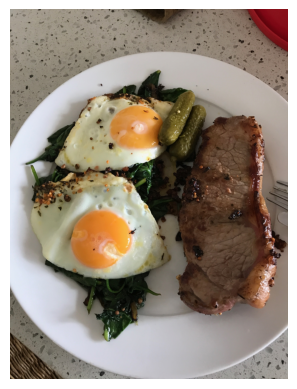

In [38]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [39]:
steak.shape

(4032, 3024, 3)